# Hans et al. (2024) data exploration

In [ ]:
# Change working directory to parent so we can import as we would from main.py
%cd ..

import matplotlib.pyplot as plt # type: ignore
from statistics import mean

import configuration as config
import functions.data_manipulation as data_funcs

/mnt/arkk/llm_detector/benchmarking


## 1. Datasets
First, let's parse and collect the data from the original Hans et al. (2024) Binoculars publication. Get some metadata about text length and composition and get the data from all six datasets into one dataframe for easy handling.

In [2]:
# Dict describing datasets to load
hans_datasets = {
    'falcon7': {
        'cc_news': 'cc_news/cc_news-falcon7.jsonl',
        'cnn': 'cnn/cnn-falcon7.jsonl',
        'pubmed': 'pubmed/pubmed-falcon7.jsonl'
    },
    'llama2-13b': {
        'cc_news': 'cc_news/cc_news-llama2_13.jsonl',
        'cnn': 'cnn/cnn-llama2_13.jsonl',
        'pubmed': 'pubmed/pubmed-llama2_13.jsonl' 
    }
}

# Output dict for collected & combined datasets
hans_data = {
    'Generation model': [],
    'Data source': [],
    'Human text length (words)': [],
    'Human text': [],
    'Synthetic text': [],
    'Synthetic text length (words)': [],
    'Human text fraction': []
}

# Output dict for datasets wide metadata
hans_metadata = {
    'Generation model': [],
    'Data source': [],
    'Records': [],
    'Mean human text length (words)': [],
    'Human text length STD': [],
    'Mean synthetic text length (words)': [],
    'Synthetic text length STD': [],
    'Mean human text fraction': []
}

# Parse, collect and combine data and get metadata
hans_metadata_df, hans_data_df = data_funcs.parse_hans_data(
    hans_datasets = hans_datasets, 
    hans_data = hans_data, 
    hans_metadata = hans_metadata,
    binoculars_data_path = config.HANS_DATA_PATH
)

# Save as JSON for later use
output_file = f'{config.HANS_DATA_PATH}/aggregated_hans_data.jsonl'

with open(output_file, 'w') as file:
    file.write(hans_data_df.to_json(lines=True, orient='records'))

Parsed falcon7, cc_news data: 1169 records
Parsed falcon7, cnn data: 876 records
Parsed falcon7, pubmed data: 112 records
Parsed llama2-13b, cc_news data: 4714 records
Parsed llama2-13b, cnn data: 2208 records
Parsed llama2-13b, pubmed data: 2198 records


Next, let's get TF-IDF across the datasets so we have some idea of the relative complexity.

In [3]:
human_tfidf_df, synthetic_tfidf_df = data_funcs.tf_idf(data_df = hans_data_df)
human_tfidf_df.head()

,00,000,0000,00000,000000,0000000172,000001,000004496,000006,0000068,...,黃之鋒,ﬁnding,ﬁne,ﬁnely,ﬁrst,ﬂaked,ﬂour,ﬂoured,ﬂuffy,𝐤𝖔𝖇𝐲
0,0.048244,0.042917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.031481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
human_tfidf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11271 entries, 0 to 11270
Columns: 175741 entries, 00 to 𝐤𝖔𝖇𝐲
dtypes: float64(175741)
memory usage: 14.8 GB


### 1.1. Hans datasets structure
Take a look at what we have:

In [5]:
# Metadata
hans_metadata_df.head(7)

,Generation model,Data source,Records,Mean human text length (words),Human text length STD,Mean synthetic text length (words),Synthetic text length STD,Mean human text fraction
0,falcon7,cc_news,1169,935.790240,775.046347,369.841610,39.872910,0.687366
1,falcon7,cnn,876,967.403429,295.668681,383.460571,26.776287,0.704008
2,falcon7,pubmed,112,2933.936937,1884.328293,336.387387,59.922703,0.861709
3,llama2-13b,cc_news,4714,863.986845,716.515544,330.481434,39.772044,0.692970
4,llama2-13b,cnn,2208,893.908473,296.323984,570.213412,133.191800,0.602143
5,llama2-13b,pubmed,2198,3257.725080,2587.036147,579.649522,130.517106,0.800563


In [6]:
# Total amounts of text
print(f"Total human text: {sum(hans_data['Human text length (words)'])} words")
print(f"Total synthetic text: {sum(hans_data['Synthetic text length (words)'])} words")
print(f"Data is {round(mean(hans_metadata_df['Mean human text fraction']) * 100, 1)}% human by words")

Total human text: 15467196 words
Total synthetic text: 4894352 words
Data is 72.5% human by words


In [7]:
print(f"Human example: {' '.join(hans_data['Human text'][0].split(' ')[:100])}")
print()
print(f"Synthetic example: {' '.join(hans_data['Synthetic text'][0].split(' ')[:100])}")

Human example: H. B. Fuller Company (NYSE:FUL) VP Traci L. Jensen sold 5,397 shares of the firm’s stock in a transaction dated Monday, October 2nd. The stock was sold at an average price of $58.40, for a total transaction of $315,184.80. The transaction was disclosed in a legal filing with the Securities & Exchange Commission, which is available through this link.
Shares of H. B. Fuller Company (NYSE:FUL) opened at 56.81 on Friday. The company’s 50-day moving average is $53.88 and its 200 day moving average is $52.11. The firm has a market capitalization of $2.87 billion, a PE ratio of 25.96 and

Synthetic example:  $54.40, for a total value of $298,532.80. Following the completion of the sale, the vice president now owns 11,041 shares of the company’s stock, valued at $594,803.40. The sale was disclosed in a document filed with the Securities & Exchange Commission, which is accessible through this link.
H. B. Fuller Company (NYSE:FUL) traded down 1.30% during midday trading on Monday,

In [8]:
# Combined dataset structure information
hans_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11271 entries, 0 to 11270
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Generation model               11271 non-null  object 
 1   Data source                    11271 non-null  object 
 2   Human text length (words)      11271 non-null  int64  
 3   Human text                     11271 non-null  object 
 4   Synthetic text                 11271 non-null  object 
 5   Synthetic text length (words)  11271 non-null  int64  
 6   Human text fraction            11271 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 616.5+ KB


In [9]:
# Combined dataset statistics
hans_data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Human text length (words),11271.0,1372.300240,1594.344645,143.000000,646.000000,848.000000,1320.50000,50234.000000
Synthetic text length (words),11271.0,434.242924,143.796153,1.000000,336.000000,374.000000,539.00000,1473.000000
Human text fraction,11271.0,0.698096,0.105767,0.377897,0.628042,0.685624,0.76408,0.996644


In [10]:
# Combined dataset sample
hans_data_df.head()

,Generation model,Data source,Human text length (words),Human text,Synthetic text,Synthetic text length (words),Human text fraction
0,falcon7,cc_news,836,H. B. Fuller Company (NYSE:FUL) VP Traci L. Je...,"$54.40, for a total value of $298,532.80. Fol...",307,0.731409
1,falcon7,cc_news,1153,"On Aug. 21, a solar eclipse will cut across th...",covers the sun.\nThe total eclipse will be vi...,382,0.751140
2,falcon7,cc_news,725,Study on Aerosol Valves Market by Infinium Glo...,of Aerosol Valves market by type (Aerosol Noz...,324,0.691134
3,falcon7,cc_news,689,"VICTORIA – More than 1,400 British Columbians ...",",423 illicit drug overdose deaths in 2017, up ...",373,0.648776
4,falcon7,cc_news,869,"On land, heatwaves can be deadly for humans an...","sometimes even larger, more mobile species of...",386,0.692430


### 1.2. Hans datasets plots
#### 1.2.1. Text length distributions

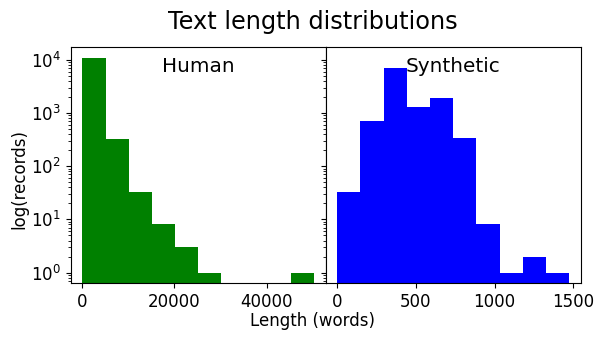

In [11]:
# Set general font size
plt.rcParams['font.size'] = 12

# Set-up figure and axis array
fig, axs = plt.subplots(1, 2, figsize = (6, 3), sharey = 'row', tight_layout = True, gridspec_kw = {'wspace':0, 'hspace':0})

# Draw the histograms
axs[0].hist(hans_data_df['Human text length (words)'], facecolor = 'green', log = True, label = 'Human text')
axs[1].hist(hans_data_df['Synthetic text length (words)'], facecolor = 'blue', log = True, label = 'synthetic text')

# Annotate figure
fig.text(0.5, 1, 'Text length distributions', ha = 'center', fontsize = 'x-large')
fig.text(0.5, 0.01, 'Length (words)', ha = 'center')
fig.text(0.01, 0.5, 'log(records)', va = 'center', ha = 'center', rotation = 90)
axs[0].set_title('Human', y = 1.0, pad = -18)
axs[1].set_title('Synthetic', y = 1.0, pad = -18)

plt.show()

This could maybe be a pitfall later - the length of the text is not a relevant feature, but the distributions of lengths are different between human and synthetic text in the dataset. We don't want to let the classifier see this. We will have to be clever about how we sample so that we end up with training data where the length distributions are the same.

#### 1.2.2. Human-synthetic text length correlation by record

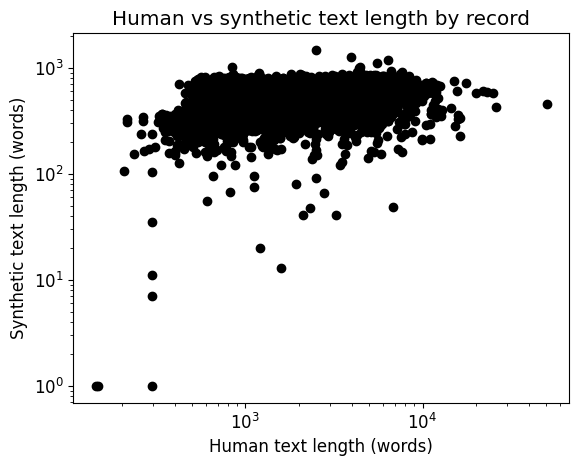

In [12]:
plt.title('Human vs synthetic text length by record')
plt.scatter(hans_data_df['Human text length (words)'], hans_data_df['Synthetic text length (words)'], color = 'black')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Human text length (words)')
plt.ylabel('Synthetic text length (words)')
plt.show()

#### 1.2.3. Text composition distribution over records

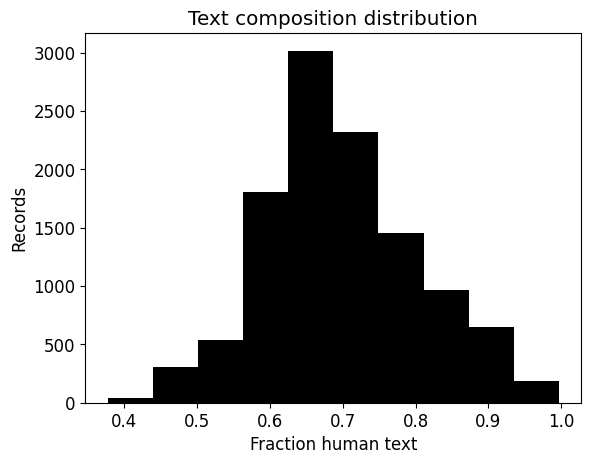

In [13]:
plt.title('Text composition distribution')
plt.hist(hans_data_df['Human text fraction'], facecolor = 'black')
plt.xlabel('Fraction human text')
plt.ylabel('Records')
plt.show()

#### 1.2.4. TF-IDF distributions

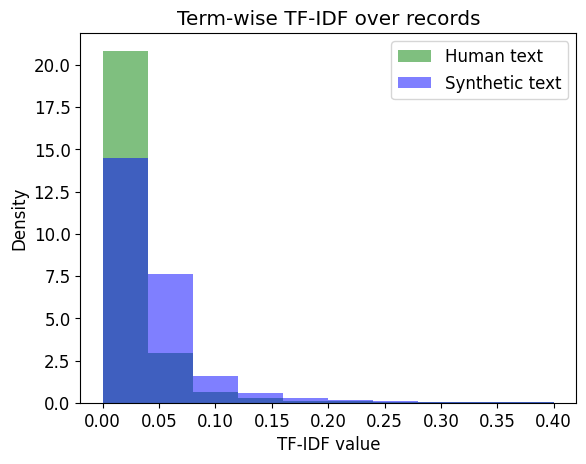

In [17]:
human_tfidfs = human_tfidf_df.to_numpy().flatten()
synthetic_tfidfs = synthetic_tfidf_df.to_numpy().flatten()

plt.title('Term-wise TF-IDF over records')
plt.hist(human_tfidfs[(human_tfidfs != 0.0) & (human_tfidfs < 0.4)], density = True, facecolor = 'green', label = 'Human text', alpha = 0.5)
plt.hist(synthetic_tfidfs[(synthetic_tfidfs != 0.0) & (synthetic_tfidfs < 0.4)], density = True, facecolor = 'blue', label = 'Synthetic text', alpha = 0.5)
plt.xlabel('TF-IDF value')
plt.ylabel('Density')
plt.legend(loc = 'upper right')
plt.show()